# Insurance cost prediction

## Data information

The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value desginated for each level.

The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.

##  Necessary Libaray

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.neural_network import MLPRegressor
import pickle
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

## Data loading

In [2]:
#Loading data using pandas
data=pd.read_csv("datasets_13720_18513_insurance(1).csv")

## Basic Checks

In [3]:
data.shape

(1338, 7)

In [4]:
# First five rows of data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Last five rows of data
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
# Features of the data 
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
# datatypes of all features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
## Checking null values in data.
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* No null values present in data

In [9]:
#checking state of data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Insights/Obervation:-

* Shape of Data set is 1338 rows and 7 features
* No null value present in dataset.
* No constant value present in dataset.

# Data Visualization

### Univariate Analysis

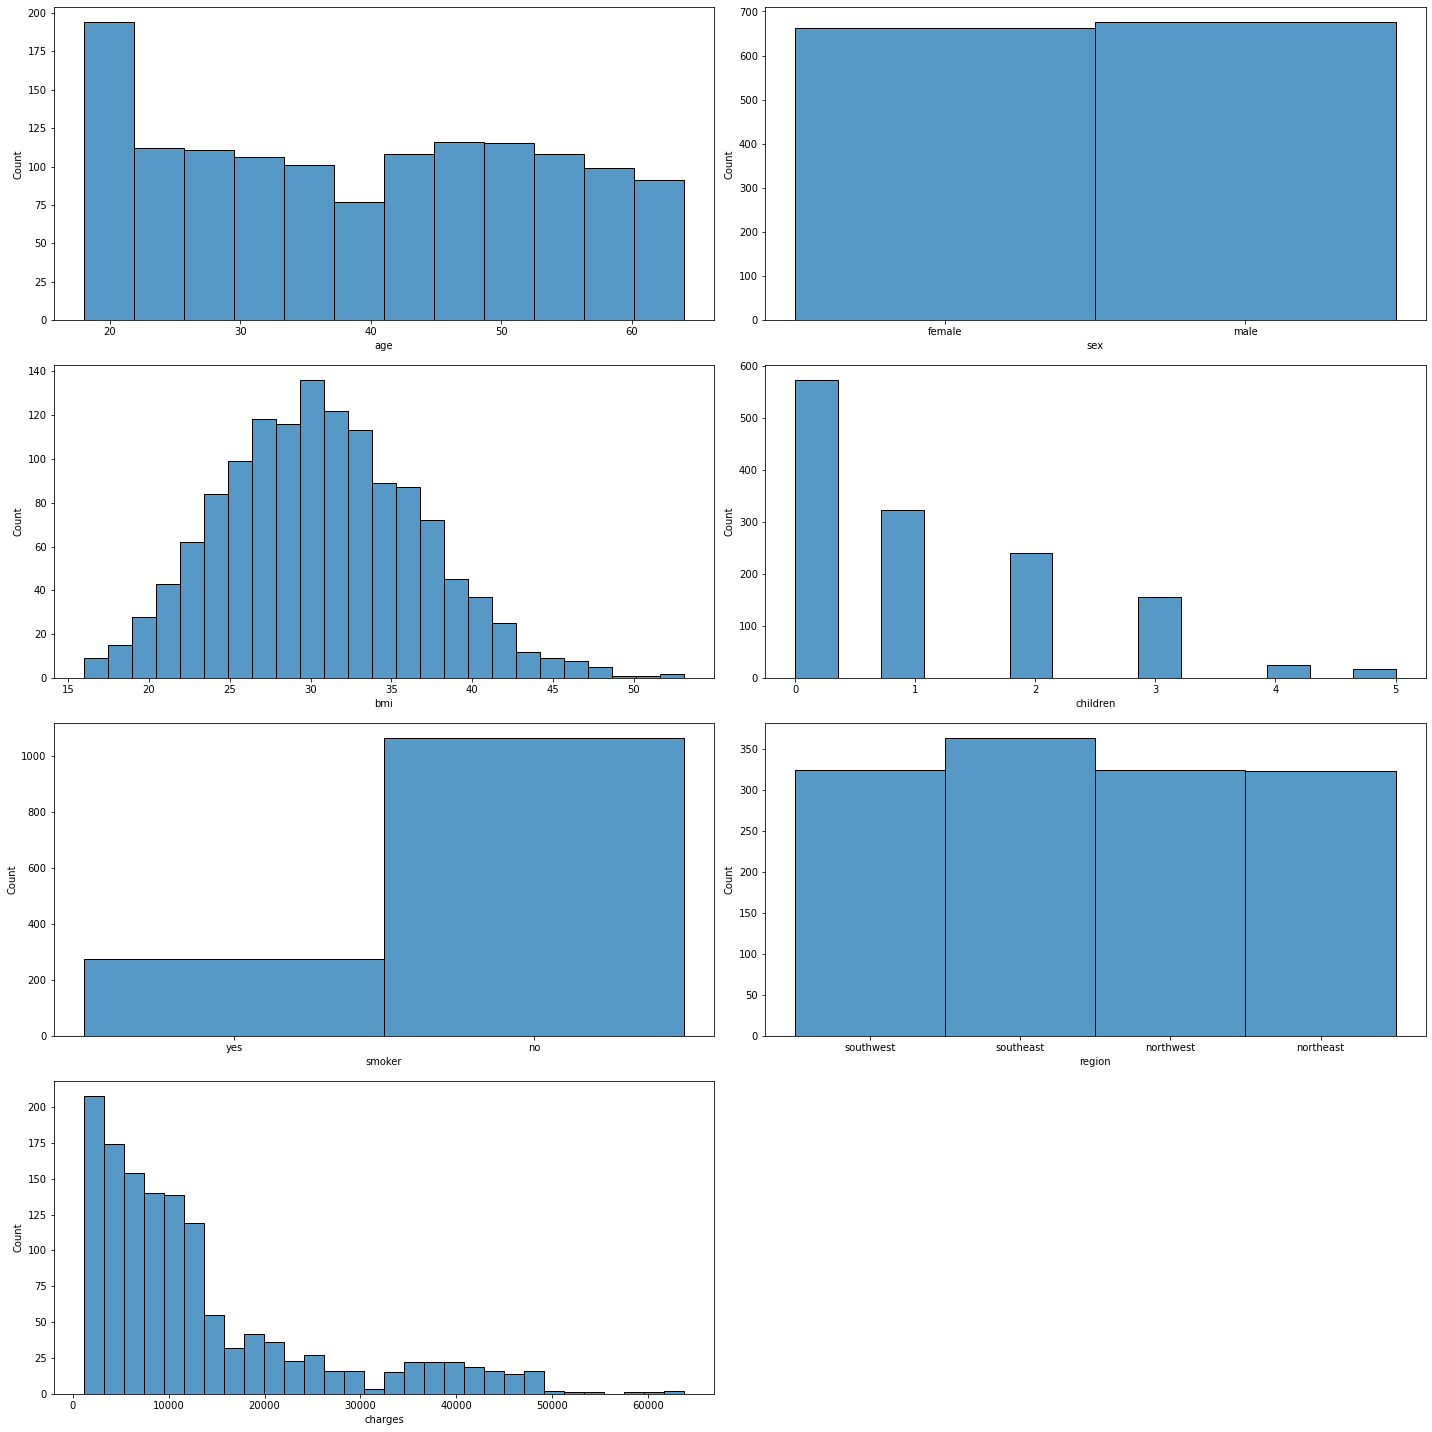

In [10]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Count',fontsize=10)
    plotnumber+=1
plt.tight_layout()

### Insights/Obervation:- 

* Most insurance taken by age range of 18 to 21
* Lowest age is 18 in highest age is 64.
* seeing the gender graph we can say that male is taking more insurance compare to female.
* Seeing BMI graph we can say that distribution is normal.
* seeing BMI graph we can see that most data lie range between 26 to 33.
* seeing children graph there are 5 label(0 to 5).
* Highest children is 5 and lowest is zero.
* Most of record have 0 children.
* seeing smoker graph there are 2 label yes or no.There are no ratio is high compare to yes.
* seeing region graph look like balance but compare to other southeast bar is high.
* looking target variable don't look like normal distribution.
* Minimum charges 1121 and maximum charges is 63,000.

### Bivariate Multivariate Analysis

<AxesSubplot:xlabel='age', ylabel='charges'>

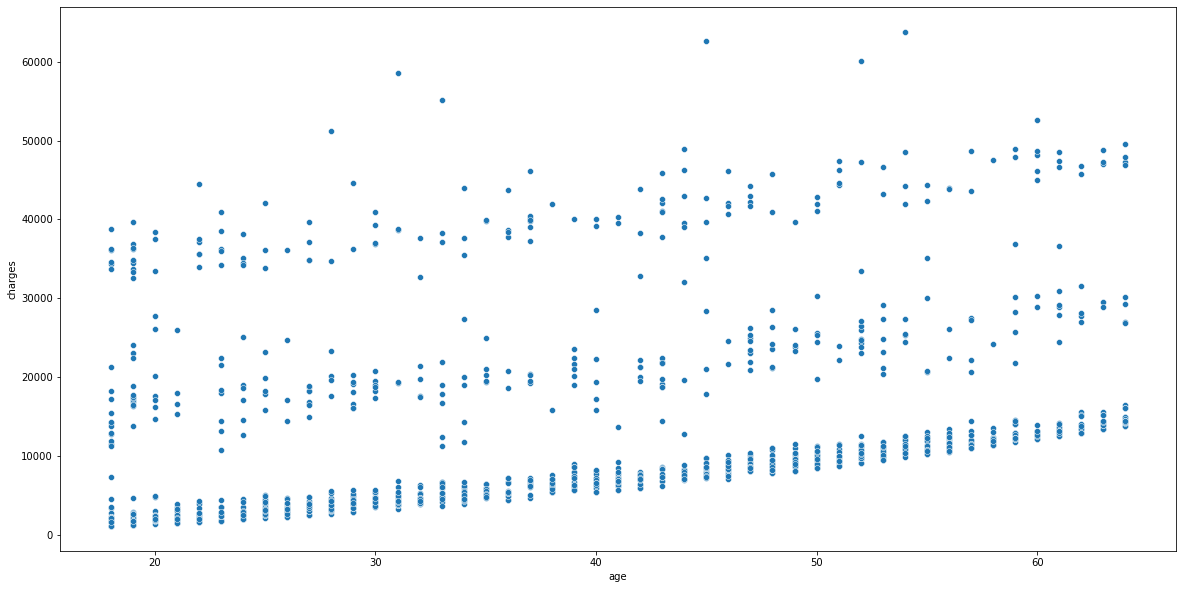

In [11]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='age',y='charges',data=data) 

* If age is increasing insurance charges is also increased.
* there is a positive correlation between charges and age.

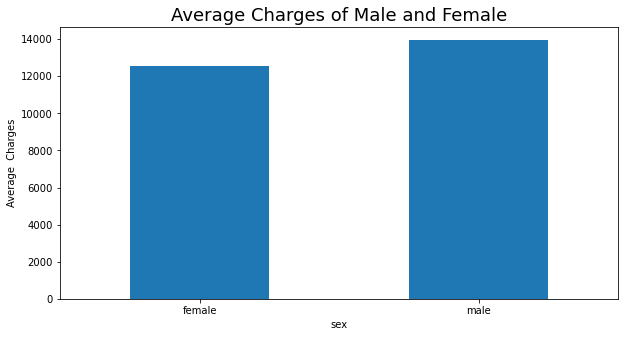

In [12]:
plt.figure(figsize=(10,5))
data.groupby(['sex'])['charges'].mean().plot.bar()
plt.ylabel('Average  Charges')
plt.title("Average Charges of Male and Female",fontsize=18)
plt.xticks(rotation = 0)
plt.show()

* male have high charges compare to female.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

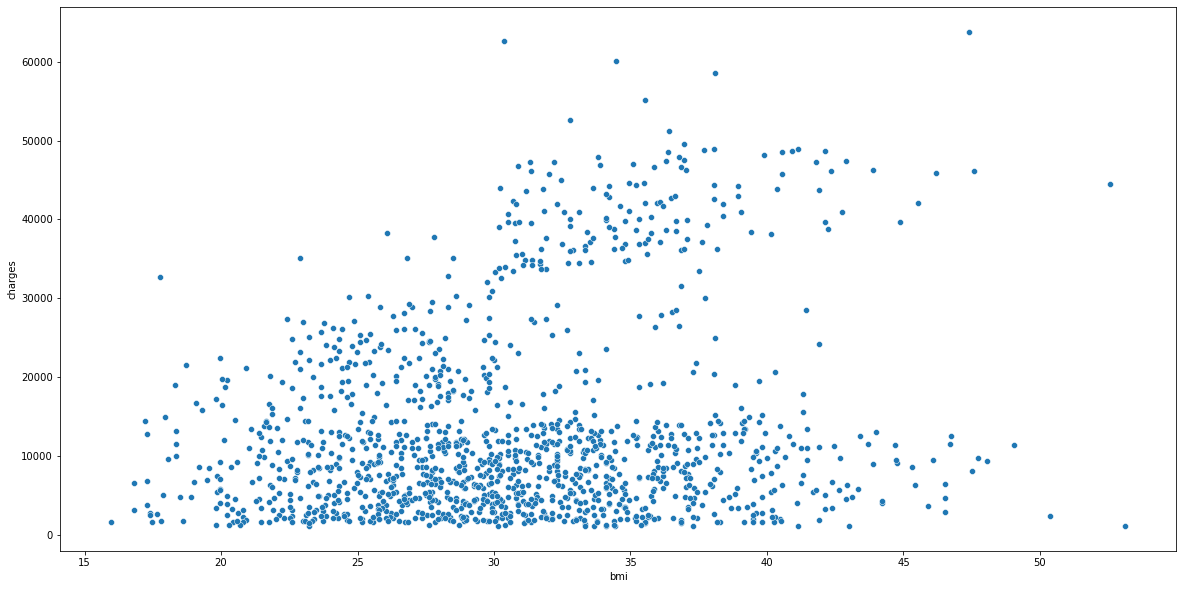

In [13]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='bmi',y='charges',data=data) 

* If bmi increase charges is also  increase there is a positive correlation between BMI and charges.

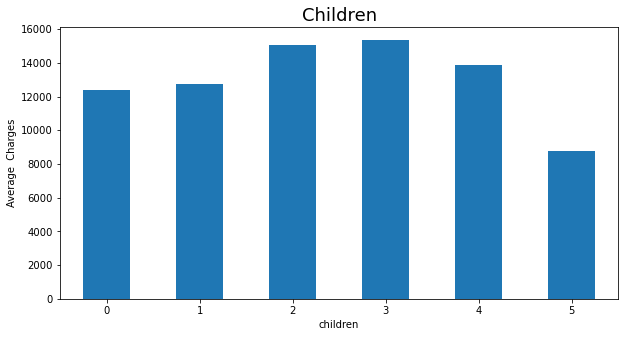

In [14]:
plt.figure(figsize=(10,5))
data.groupby(['children'])['charges'].mean().plot.bar()
plt.ylabel('Average  Charges')
plt.title("Children",fontsize=18)
plt.xticks(rotation = 0)
plt.show()

<AxesSubplot:xlabel='smoker', ylabel='charges'>

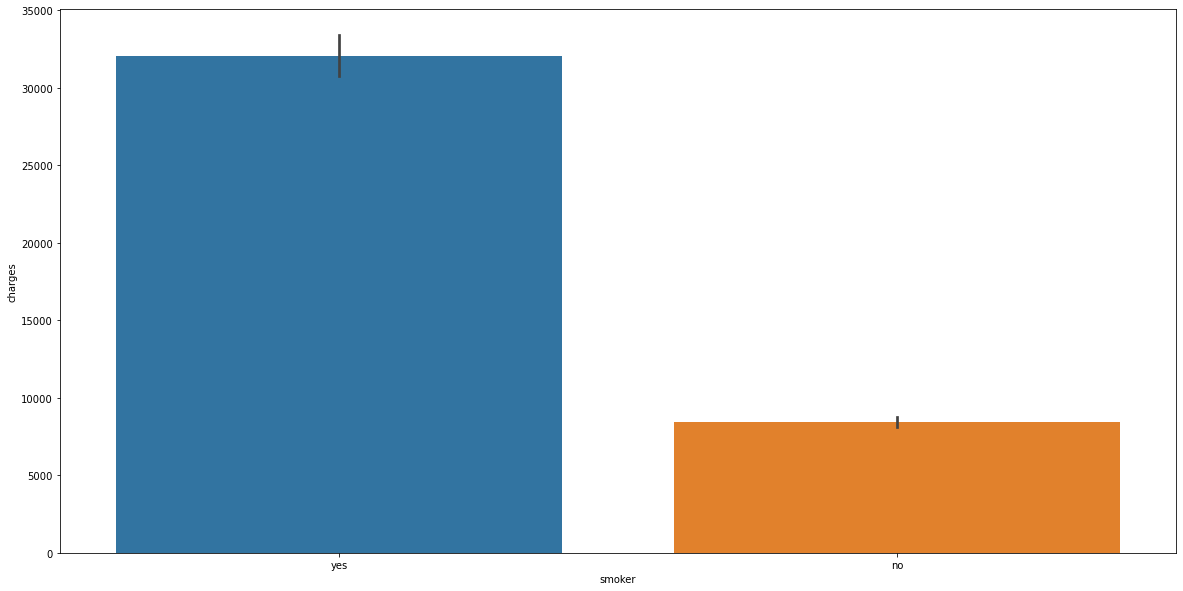

In [15]:
plt.figure(figsize=(20,10))
sns.barplot(x='smoker',y='charges',data=data) 

* The person is doing smoke than charges is high

##### Checking outlier

<AxesSubplot:xlabel='age'>

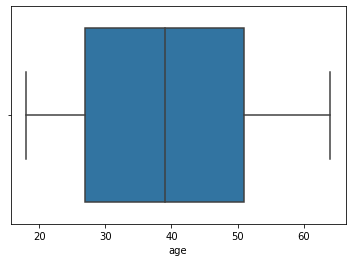

In [16]:
sns.boxplot(data['age'])

<AxesSubplot:xlabel='bmi'>

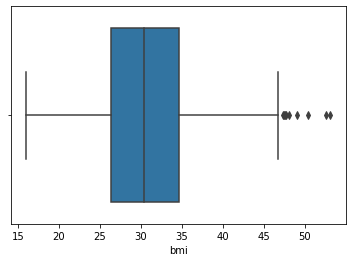

In [17]:
sns.boxplot(data['bmi'])

* outlier present in BMI feature

<AxesSubplot:xlabel='children'>

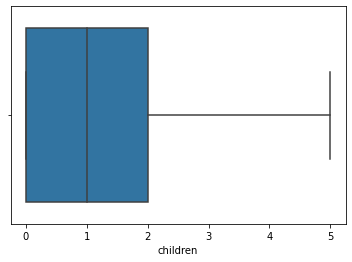

In [18]:
sns.boxplot(data['children'])

##### Handling outlier using IQR

In [6]:
# Interquartile range (IQR)  of Fc Feature
IQR = stats.iqr(data.bmi, interpolation = 'midpoint') 
IQR

8.384999999999998

In [7]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data.bmi.quantile(0.25)
# Third quartile (Q3) 
Q3 =data.bmi.quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR
print(min_limit)
max_limit=Q3 +1.5*IQR
print(max_limit)

13.718750000000004
47.271249999999995


In [8]:
## filetring the data
data.loc[data['bmi'] > max_limit]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [9]:
## filetring the data
data.loc[data['bmi'] < min_limit]

,age,sex,bmi,children,smoker,region,charges


In [10]:
# puting mean becuase data is normally distributed.
data.loc[data['bmi'] > max_limit,'bmi']=np.mean(data.bmi) 

<AxesSubplot:xlabel='bmi'>

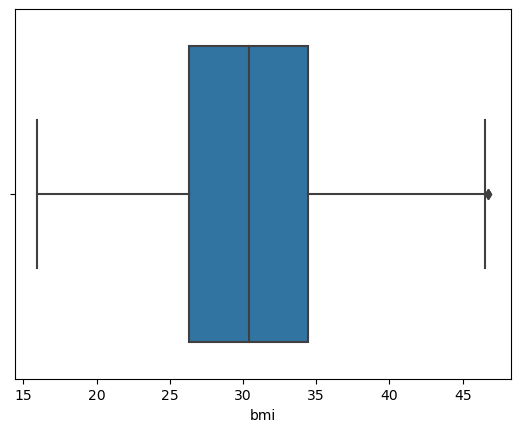

In [11]:
# Checking
sns.boxplot(data['bmi'])

####  Lebel encoding

In [12]:
s=LabelEncoder().fit(data['sex'])
sm=LabelEncoder().fit(data['smoker'])
re=LabelEncoder().fit(data['region'])
data["sex"] = s.transform(data["sex"])
data["smoker"] = sm.transform(data["smoker"])
data["region"] = re.transform(data["region"])

In [35]:
data['region'].unique()

array([3, 2, 1, 0])

In [41]:
data.drop(['region'],axis=1,inplace=True)

# Train and Test split

In [42]:
x=data.iloc[:,:-1]
y=data['charges']

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [44]:
#Checking X_train
x_train.head()

,age,sex,bmi,children,smoker
1046,43,0,25.080,0,0
682,39,1,35.300,2,1
1037,45,0,30.495,1,1
490,19,0,32.900,0,0
39,60,1,39.900,0,1


In [45]:
#Checking X_test
x_test.head()

,age,sex,bmi,children,smoker
764,45,0,25.175,2,0
887,36,0,30.020,0,0
890,64,0,26.885,0,1
1293,46,1,25.745,3,0
259,19,1,31.920,0,1


In [19]:
#Checking y_train
y_train.head()

1046     7325.04820
682     40103.89000
1037    39725.51805
490      1748.77400
39      48173.36100
Name: charges, dtype: float64

In [20]:
#Checking y_test
y_test.head()

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
Name: charges, dtype: float64

## Scaling

In [21]:
scaler=StandardScaler()

In [22]:
x_train_s=scaler.fit_transform(x_train)

In [23]:
x_test_s=scaler.transform(x_test)

##  Model Building

###  LinearRegression

In [29]:
lr=LinearRegression()
lr.fit(x_train_s,y_train)

LinearRegression()

In [30]:
lr_p_t=lr.predict(x_test_s)

In [31]:
r2score=r2_score(y_test,lr_p_t)
r2score

0.7524299347591592

In [32]:
x_test.shape

(442, 6)

In [33]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.75)*(442-1)/(442-6-1)
adjusted_r2

0.746551724137931

In [34]:
lr_p_train=lr.predict(x_train_s)

In [35]:
r2score=r2_score(y_train,lr_p_train)
r2score

0.7469983242243314

In [36]:
x_train.shape

(896, 6)

In [38]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.75)*(896-1)/(896-6-1)
adjusted_r2

0.748312710911136

### DecisionTree

In [39]:
dt=DecisionTreeRegressor()

In [40]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [41]:
dt_p_t=dt.predict(x_test)

In [42]:
r2score=r2_score(y_test,dt_p_t)
r2score

0.6808801469725672

#### Hyperparameters of DecisionTree

In [43]:
params = {
    "criterion":('friedman_mse', 'absolute_error', 'poisson'), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}

dt=DecisionTreeRegressor()
tree_cv = GridSearchCV(dt, params, scoring="r2", n_jobs=-1, verbose=1, cv=3)

tree_cv.fit(x_train,y_train)
best_params=tree_cv.best_params_
print(best_params)

Fitting 3 folds for each of 6498 candidates, totalling 19494 fits
{'criterion': 'friedman_mse', 'max_depth': 4, 'min_samples_leaf': 14, 'min_samples_split': 2, 'splitter': 'best'}


In [44]:
dt1=DecisionTreeRegressor(**best_params)

In [45]:
dt1.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      min_samples_leaf=14)

In [46]:
dt_p_t=dt1.predict(x_test)

In [47]:
r2score=r2_score(y_test,dt_p_t)
r2score

0.8472682147030578

In [48]:
x_test.shape

(442, 6)

In [49]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.85)*(442-1)/(442-6-1)
adjusted_r2

0.8479310344827586

In [50]:
dt_p_train=dt1.predict(x_train)

In [51]:
r2score=r2_score(y_train,dt_p_train)
r2score

0.8706022542715405

In [52]:
x_train.shape

(896, 6)

In [53]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.87)*(896-1)/(896-6-1)
adjusted_r2

0.8691226096737907

### Ridge Regression

In [54]:
rr=Ridge()

In [55]:
rr.fit(x_train,y_train)

Ridge()

In [56]:
rr_p_t=rr.predict(x_test)

In [57]:
r2score=r2_score(y_test,rr_p_t)
r2score

0.7522500868342045

In [58]:
x_test.shape

(442, 6)

In [59]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.75)*(442-1)/(442-6-1)
adjusted_r2

0.746551724137931

In [60]:
rr_p_train=rr.predict(x_train)

In [61]:
r2score=r2_score(y_train,dt_p_train)
r2score

0.8706022542715405

In [62]:
x_train.shape

(896, 6)

In [63]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.87)*(896-1)/(896-6-1)
adjusted_r2

0.8691226096737907

### RandomForest

In [64]:
rf=RandomForestRegressor()

In [65]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [66]:
rf_p_t=rf.predict(x_test)

In [67]:
r2score=r2_score(y_test,rf_p_t)
r2score

0.8430412078854814

In [24]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
grid_parm = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf=RandomForestRegressor()
rf_cv=GridSearchCV(rf,grid_parm,scoring="r2",n_jobs=-1,verbose=1,cv=2)

rf_cv.fit(x_train,y_train)
best_params=rf_cv.best_params_
print(best_params)

Fitting 2 folds for each of 4320 candidates, totalling 8640 fits


KeyboardInterrupt: 

In [25]:
rf1=RandomForestRegressor(**best_params)

In [46]:
rf1.fit(x_train,y_train)

RandomForestRegressor(min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200)

In [47]:
rf1_p_t=rf1.predict(x_test)

In [48]:
r2score=r2_score(y_test,rf1_p_t)
r2score

0.8570407015870379

In [49]:
rf1_p_train=rf1.predict(x_train)

In [50]:
r2score=r2_score(y_train,rf1_p_train)
r2score

0.9077933100880594

In [51]:
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf1, file)

### Lasso Regression

In [62]:
ls=Lasso()

In [63]:
ls.fit(x_train,y_train)

Lasso()

In [64]:
ls_p_t=ls.predict(x_test)

In [65]:
r2score=r2_score(y_test,ls_p_t)
r2score

0.7524317518661318

In [66]:
ls_p_train=ls.predict(x_train)

In [67]:
r2score=r2_score(y_train,ls_p_train)
r2score

0.7469982489228184